**INTRODUCTION**

* I'm aimed to predict the probability at defualt 
* comparing Models performace between XGBoost Classifier & Logistic regression
* the dataset is sourced from kaggel 
* ['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']



In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('credit_risk_dataset.csv')
print(df.head())
#data prepration
print(df.isna().sum())
print(len(df))

# df=df.dropna()
loan_int_rate=df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['loan_int_rate']=loan_int_rate
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
print(f"after filling \n {df.isna().sum()}")

print(df.isna().sum())
print(df.shape)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


**0 = non default**

**1 = default**

**Y = Prior Default**

**N = No Prior Default**


Axes(0.125,0.11;0.775x0.77)


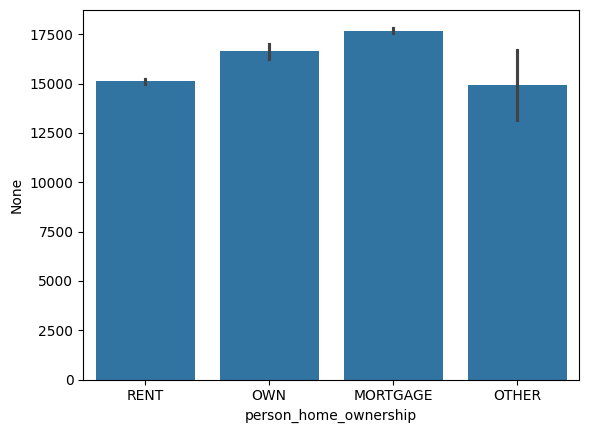

In [56]:
#EDA 
print(sns.barplot(data = df, x='person_home_ownership', y = df.index))


Axes(0.125,0.11;0.775x0.77)


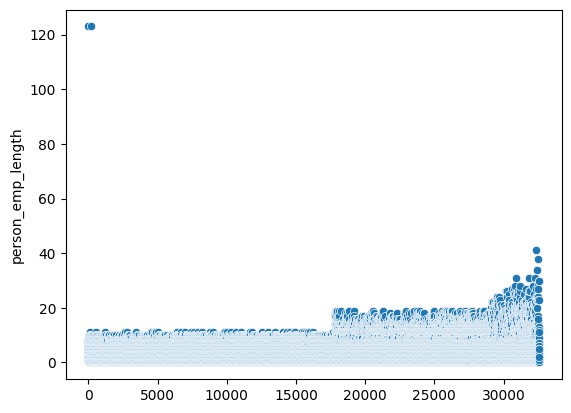

In [57]:
print(sns.scatterplot(data = df['person_emp_length'])) # work experience 


([<matplotlib.patches.Wedge object at 0x0000018E6390E2D0>, <matplotlib.patches.Wedge object at 0x0000018E63907A90>, <matplotlib.patches.Wedge object at 0x0000018E638FD250>, <matplotlib.patches.Wedge object at 0x0000018E638FCA90>, <matplotlib.patches.Wedge object at 0x0000018E638F4290>, <matplotlib.patches.Wedge object at 0x0000018E638F5CD0>], [Text(0.8938423182189754, 0.6411286221663545, 'PERSONAL'), Text(-0.28177130915657705, 1.0632990780284675, 'EDUCATION'), Text(-1.0832158354292345, 0.19142479953064, 'MEDICAL'), Text(-0.6760809125162813, -0.8677065170500637, 'VENTURE'), Text(0.4008691173279511, -1.0243553830447272, 'HOMEIMPROVEMENT'), Text(1.0342089345016523, -0.37471573198487035, 'DEBTCONSOLIDATION')], [Text(0.48755035539216834, 0.34970652118164786, '19.8%'), Text(-0.15369344135813293, 0.5799813152882549, '18.6%'), Text(-0.5908450011432187, 0.10441352701671273, '17.6%'), Text(-0.3687714068270625, -0.47329446384548923, '16.9%'), Text(0.2186558821788824, -0.5587392998425783, '16.0%')

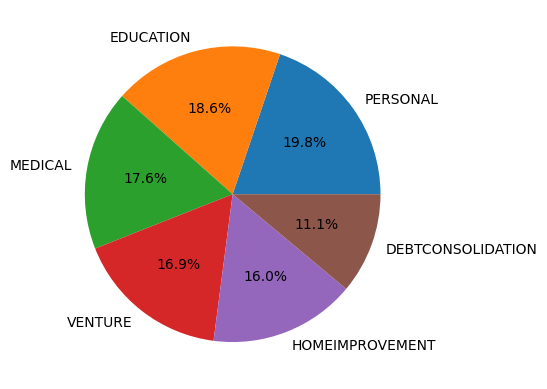

In [58]:
print(plt.pie(df['loan_intent'].value_counts(), labels= df['loan_intent'].unique(), autopct='%1.1f%%'))


Axes(0.125,0.11;0.775x0.77)


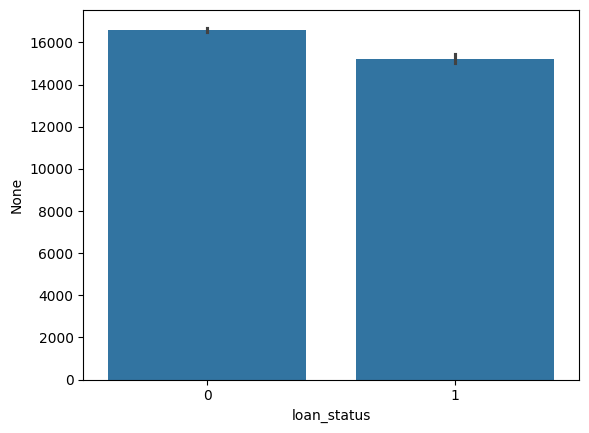

In [59]:
print(sns.barplot(data =df, x ='loan_status', y = df.index))

<Axes: xlabel='loan_intent', ylabel='Count'>

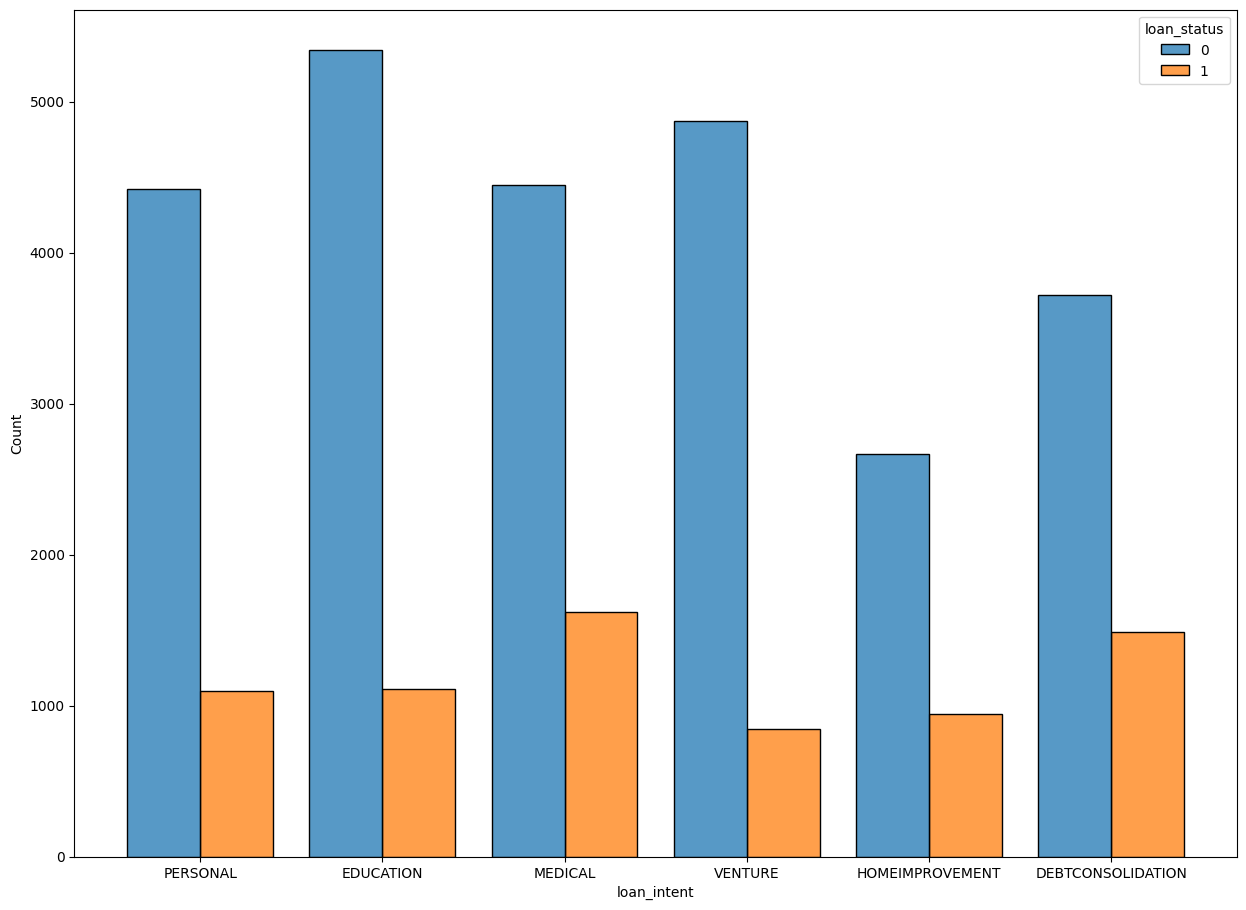

In [60]:
plt.figure(figsize=(15,11))
sns.histplot(data = df, x='loan_intent', hue = 'loan_status', multiple='dodge', shrink=0.8)

Accuracy: 0.9391112202307881
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6398
           1       0.95      0.75      0.84      1748

    accuracy                           0.94      8146
   macro avg       0.94      0.87      0.90      8146
weighted avg       0.94      0.94      0.94      8146

roc_auc_score0.9544872611077689
   person_age  person_income  person_emp_length person_home_ownership  \
0          22         500000                  1                   OWN   

  loan_intent  loan_amnt  loan_int_rate  loan_percent_income loan_grade  \
0    PERSONAL    1500000             14                 0.49          C   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                           5  
Default represented as 1 else 0 :- [0]


c:\Users\Predator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


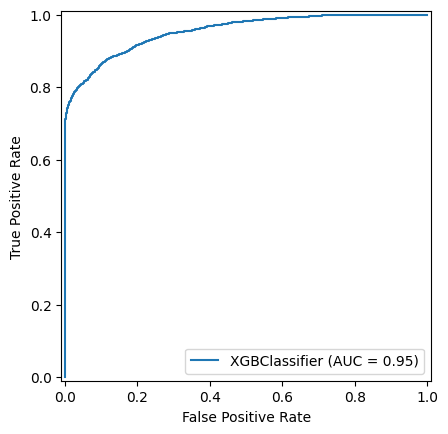

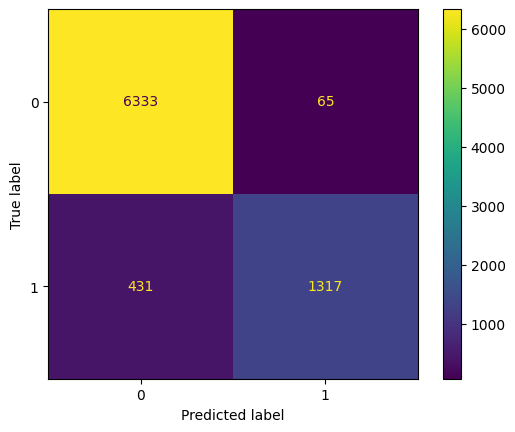

In [61]:
#One hotencoding and ordinal encoding 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
x = df.drop(columns=['loan_status'], axis=1)
y = df['loan_status']

transformer = ColumnTransformer([("loan_intent", OneHotEncoder(sparse_output=False, drop='first'), ["loan_intent"]),
                                               ("person_home_ownership", OneHotEncoder(sparse_output=False, drop="first"), ["person_home_ownership"]),
                                               ("loan_grade", OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']]), ["loan_grade"]),
                                               ("cb_person_default_on_file", OrdinalEncoder(categories=[['N', 'Y']]), ["cb_person_default_on_file"])],
                                               remainder= 'passthrough')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle=True, random_state = 1000)
x_train_t = transformer.fit_transform(x_train)
x_test_t = transformer.transform(x_test)

from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay


model = XGBClassifier()
model.fit(x_train_t,y_train)


y_pred = model.predict(x_test_t)
y_pred_proba = model.predict_proba(x_test_t)[:,1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc_score=roc_auc_score(y_test, y_pred_proba)
print(f"roc_auc_score{roc_auc_score}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 

roc_display = RocCurveDisplay(fpr = fpr, tpr =tpr, roc_auc= roc_auc_score, estimator_name='XGBClassifier')
roc_display.plot()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

def back_test(input_data):
    print(input_data)
    input_data_t=transformer.transform(input_data)
    predict = model.predict(input_data_t)
    return print(f"Default represented as 1 else 0 :- {predict}")


input_data = {"person_age": 22, "person_income": 500000, "person_emp_length": 1, "person_home_ownership": "OWN", "loan_intent": "PERSONAL", "loan_amnt": 1500000, "loan_int_rate": 14, "loan_percent_income": 0.49
              , "loan_grade": "C", "cb_person_default_on_file": "N", "cb_person_cred_hist_length": 5}
input_data = pd.DataFrame([input_data])
back_test(input_data)

**Precision Score** :-  accurate predicting all the classifier values 

**recall** :-  how my did the model correctly identified 

**f1 score** :- a balance between precision and recall 

**support** :- how many instance were there in the data


**TPR** :- True positive rate  also know as recall rate

**FPR** :- false positive rate a tradeoff sensitivity and specificity 

In [62]:
#Logical regression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle=True, random_state = 1000)
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

x_train_t = scaler.fit_transform(x_train_t)
x_test_t = scaler.transform(x_test_t)
model.fit(x_train_t, y_train)
y_pred = model.predict(x_test_t)
y_pred_proba = model.predict_proba(x_test_t)[:,1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.859317456420329
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6398
           1       0.74      0.53      0.62      1748

    accuracy                           0.86      8146
   macro avg       0.81      0.74      0.77      8146
weighted avg       0.85      0.86      0.85      8146

